# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

# Run Comparisons

 - sigma = 1.0 # Validation loss = 3.729; Validation accuracy = 0.014 (01%)
 - sigma = 0.1 # Validation loss = 3.410; Validation accuracy = 0.103 (10%)
 - Duo = True # Validation loss = 0.515; Validation accuracy = 0.846 (85%)
 - Tres = True; # Validation loss = 3.861; Validation accuracy = 0.058 (06%)
 - Alpha = True; # Validation loss = 0.499; Validation accuracy = 0.859 (86%)
 - Alpha (10 Epochs; BatchSize=50) # Validation loss = 0.177; Validation accuracy = 0.964 (96%)
   - Test loss = 0.826; Test accuracy = 0.890 (89%)
   - External Images Accuracy:
       - For K=1 55%
       - For K=2 88%
       - For K=3 88%

 - Alpha GPU (50 Epochs; BatchSize=2000) # Validation loss = 0.245; Validation accuracy = 0.947 (95%)
   - Test loss = 1.066; Test accuracy = 0.859 (86%)
   - External Images Accuracy:
       - For K=1 44%
       - For K=2 77%
       - For K=3 88%

NOTE: The various experiments are ommited from this notebook for clarity and brevity

---
## Step 0: Load The Data

In [8]:
# Load pickled data
import pickle

DATASET_DIR = './dataset/german-pickled-dataset/'
LABEL_NAMES_FILE = DATASET_DIR + 'signnames.csv'

# Load training and testing data
training_file = DATASET_DIR + 'train.p'
testing_file = DATASET_DIR + 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

### Split Data into 80/20 Training/Validation Set

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print ("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [10]:
### Replace each question mark with the appropriate value.
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
sorted_classes, class_indices, class_counts = np.unique(y_train, return_index=True, return_counts=True)
n_classes = len(sorted_classes)


print("Number of training examples =", n_train)
print("Number of validation examples =", len(X_validation))
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 31367
Number of validation examples = 7842
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [11]:
import tensorflow as tf

# One Hot Encoding for Y
one_hot_y_train = tf.one_hot(y_train, n_classes)
one_hot_y_test = tf.one_hot(y_test, n_classes)
one_hot_y_validation = tf.one_hot(y_validation, n_classes)


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

### Data Exploration & Visualization

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# import cv2
# print("Open CV Version:", cv2.__version__)
# print("Matplotlib Version:", plt.__version__)

In [13]:
# Get ClassId -> SignName Mapping from LABEL_NAMES_FILE

labels = dict()

with open(LABEL_NAMES_FILE, 'r') as f:
    labels_data = f.readlines()
    
    for i, line in enumerate(labels_data):
        if i == 0:
            continue # Skip Header

        labelid, labelname = line.strip().split(',')

        if int(labelid) not in labels:
            labels[int(labelid)] = labelname


print("Label \tCount (Freq)\t SignName")

for label, count in zip(sorted_classes, class_counts):
    print("%4d \t %4d \t\t %s" % (label, count, labels[label]))

Label 	Count (Freq)	 SignName
   0 	  169 		 Speed limit (20km/h)
   1 	 1781 		 Speed limit (30km/h)
   2 	 1799 		 Speed limit (50km/h)
   3 	 1134 		 Speed limit (60km/h)
   4 	 1578 		 Speed limit (70km/h)
   5 	 1485 		 Speed limit (80km/h)
   6 	  332 		 End of speed limit (80km/h)
   7 	 1143 		 Speed limit (100km/h)
   8 	 1147 		 Speed limit (120km/h)
   9 	 1189 		 No passing
  10 	 1619 		 No passing for vehicles over 3.5 metric tons
  11 	 1040 		 Right-of-way at the next intersection
  12 	 1691 		 Priority road
  13 	 1730 		 Yield
  14 	  614 		 Stop
  15 	  513 		 No vehicles
  16 	  329 		 Vehicles over 3.5 metric tons prohibited
  17 	  884 		 No entry
  18 	  982 		 General caution
  19 	  176 		 Dangerous curve to the left
  20 	  286 		 Dangerous curve to the right
  21 	  261 		 Double curve
  22 	  313 		 Bumpy road
  23 	  411 		 Slippery road
  24 	  203 		 Road narrows on the right
  25 	 1181 		 Road work
  26 	  467 		 Traffic signals
  27 	  193 		 Pedestri

### Show sample images from each class

Title Legend: [Index] SignName {Count}


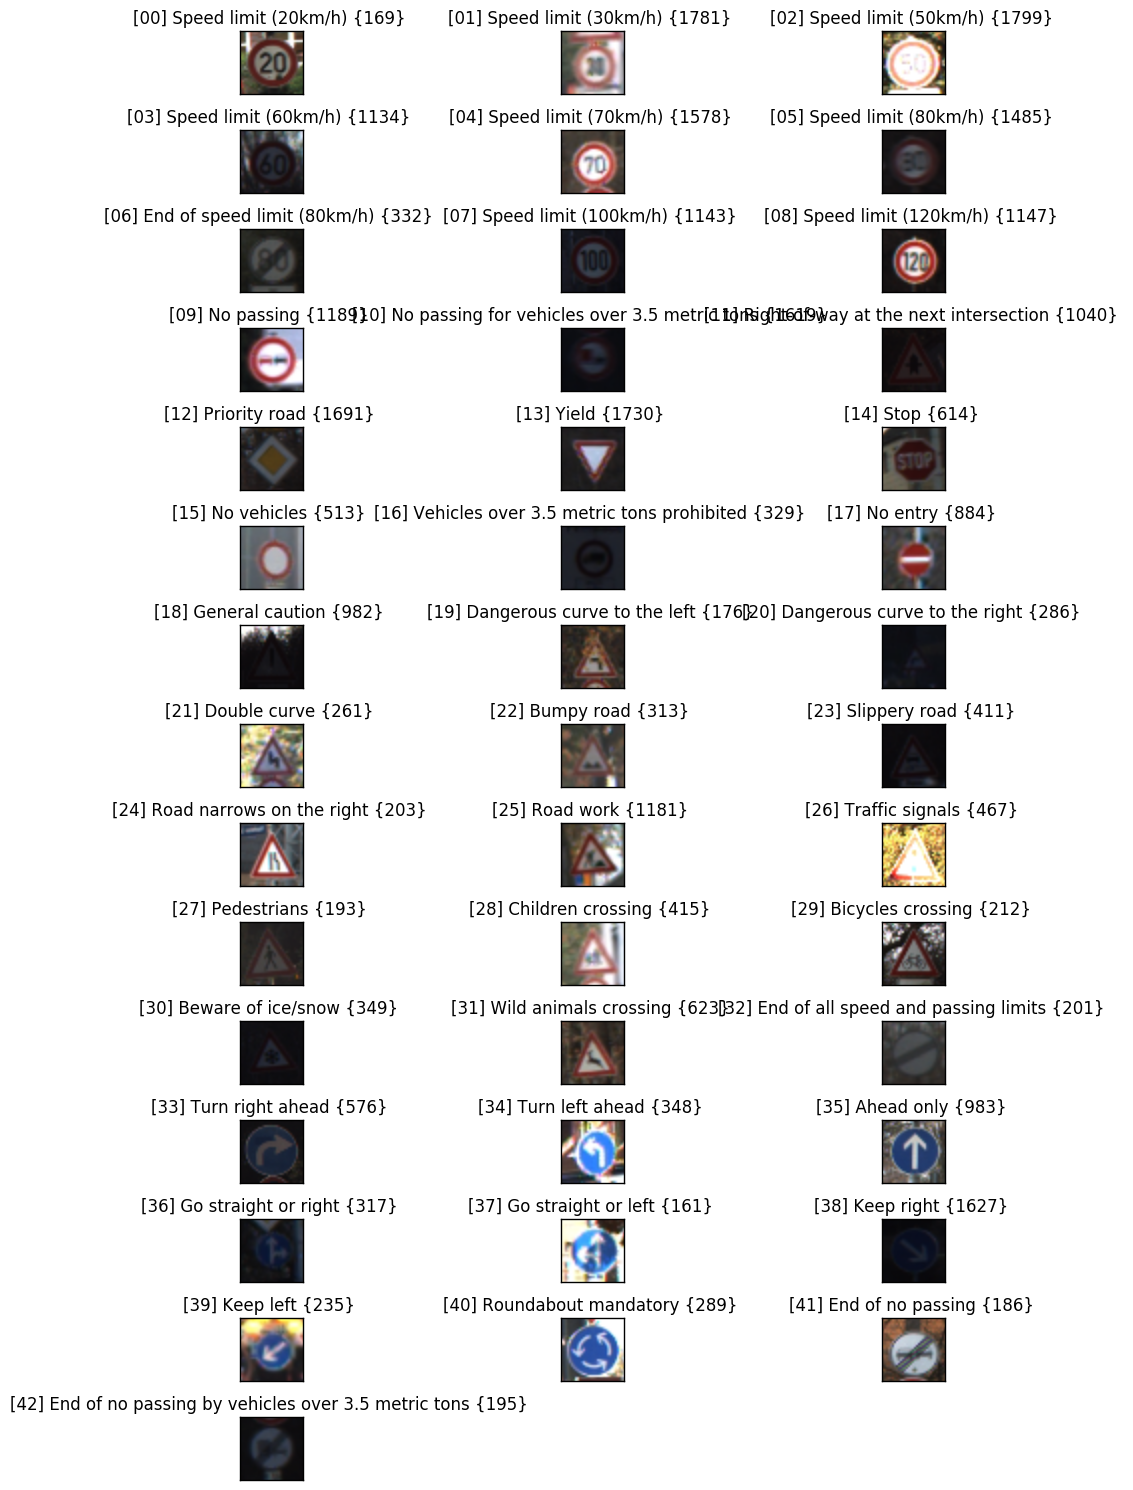

In [14]:
# from IPython.core.debugger import Tracer
# Tracer()()

print("Title Legend: [Index] SignName {Count}")

plt.figure(figsize=(10,15))
for i in range(0, n_classes):
    axis = plt.subplot(n_classes/3 + 1, 3, i+1)
    axis.xaxis.set_visible(False)
    axis.yaxis.set_visible(False)
    plt.imshow(X_train[class_indices[i]])
    plt.title("[%02d] %s {%d} " % (i, labels[i], class_counts[i]))
plt.tight_layout()
plt.show()



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point.

## Implementation

### Preprocessing
I will perform the following preprocessing steps, if necessary:
1. contrast_normalization() or Min Max Normalization (done)
- rgb_to_grayscale() (done)
- dataset_balancing()
- Bounding Box Cropping
- fake_data()
 - Add Noise
 - Augmented Data

RGB Shape (32, 32, 3)


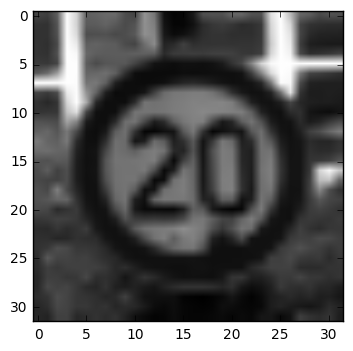

In [15]:
import cv2
def rgb_to_grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

image=X_train[class_indices[0]] 
print("RGB Shape", image.shape)

gray = rgb_to_grayscale(image)
plt.imshow(gray, cmap='gray')

# Preprocessing > Contrast Normalization 

RGB Shape (32, 32, 3)
Gray Shape (32, 32)
Random Idx: 6766
Min, Max 10 49
Min, Max 0.0 255.0


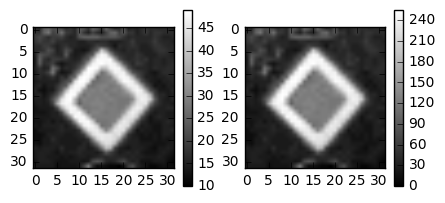

In [16]:
import random

rand_idx = random.randrange(0, 10000)
# rand_idx = 5461

image=X_train[rand_idx]
print("RGB Shape", image.shape)
gray = rgb_to_grayscale(image)
print("Gray Shape", gray.shape)
# plt.imshow(gray, cmap='gray')

def contrast_normalization(grayscale):
    """ Stretch Contrast Min-Max of Grayscale Image to [0.0, 255.0]
    """
    dest= grayscale.copy()
    imgmin = grayscale.min()
    imgmax = grayscale.max()
    stretch_ratio = 255/float(imgmax-imgmin)
    return (grayscale - imgmin)*stretch_ratio

# Alternatively
#     dest = cv2.normalize(grayscale, dest, alpha=0, beta=255, norm_type=NORM_MINMAX)
#     return dest

 
orig = gray.copy()
    
plt.figure(figsize=(5,5))

plt.subplot(2,2,1)
plt.imshow(orig, cmap='gray')
plt.colorbar()

print ("Random Idx: %d" % rand_idx)
print("Min, Max", orig.min(), orig.max())

plt.subplot(2,2,2)
normalized_gray = contrast_normalization(gray)
print("Min, Max", normalized_gray.min(), normalized_gray.max())
plt.imshow(normalized_gray, cmap='gray')
plt.colorbar()



### NOTE:
The images visually don't render any different however the scales are different. Hence they have been contrast adjusted.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I chose:
### (1) rgb_to_grayscale()
I believe that shape plays a more significant role than color in sign identification. The claim is also supported by the fact that the department of transportation would take into considereation the color blind folk and thus does not does not define color differentialble signs. In case, it turns out that I do not achive significant performance (80% Accuracy), I will revert to using 3-Channel data to achieve better performance.

### (2) contrast_normalization() | Min Max Normalization
As different images are exposed to different lighting conditions the same signs might have different contrasts. It would be healthy for the neural network to operate on a balanced dataset with a well defined min/max range.



In [17]:
# TODO (OPTIONAL)
### Generate data additional data 
### and split the data into training/validation/testing sets here.

# SOLUTION: 
# Train/Test/Validation Split Done in prior cells.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

**Train/Validation Split**:
I use the scikit learn function `train_test_split` to split training data into training and validation set. The split ratio was 80/20. The function randomly distributes values to the set based on the `split_percentage` and `random_seed` provided during the call. Here are the number of examples in each set.
```
Number of training examples = 31367
Number of validation examples = 7842
Number of testing examples = 12630
```

**Training**: I use batch processing for training. I did not generate additional data as I found the test set performance to be reasonably high. I will come back and add noise / or rotate the images to add additional data if needed. 

**Noise and Robustness**:
I believe the system already is noisy as the images are not all clicked in the same orthogonal plane. Also, images not being cropped add to the noise and make the system more robust.

### Neural Network Architecture: LeNet-5

#### Global Variables, Initial Weights, Biases and Layer Widths

In [18]:
LOGDIR = "./logs/train/"

# Constants
EPOCHS = 50
# BATCH_SIZE = 50
BATCH_SIZE = 2000 # Jan7; Testing GPU Utilization


# n_input = 32*32*1   # We intend to convert 32*32 traffic sign images to grayscale
n_classes = 43      # There are 43 different signs to classify

In [19]:
"""
LeNet Architecture
"""

mu = 0
sigma = 0.1 # Validation loss = 3.410; Validation accuracy = 0.103
# sigma = 1.0 # Validation loss = 3.729; Validation accuracy = 0.014 (1-2%)

# Initial Weights
layer_width = {
    'l1': 6,
    'l2': 16,
    'fc0': 5*5*16,
    'fc1': 120,
    'fc2': 84,
    'fc3': 43,
#     'out': n_classes
}

weights = {
    'l1': tf.Variable(
            tf.truncated_normal(
                [5, 5, 1, layer_width['l1']],
                mean = mu, stddev = sigma),
                name='Weights_l1'), 
    'l2': tf.Variable(
            tf.truncated_normal(
                [5, 5, layer_width['l1'], layer_width['l2']], 
                mean = mu, stddev = sigma),
                name='Weights_l2'),
    #'fc0': # Flatten has no Weights,
    'fc1': tf.Variable(
            tf.truncated_normal(
                shape=(layer_width['fc0'], layer_width['fc1']), 
                mean = mu, stddev = sigma),
                name='Weights_fc_1'),
    'fc2': tf.Variable(
            tf.truncated_normal(
                shape=(layer_width['fc1'], layer_width['fc2']), 
                mean = mu, stddev = sigma),
                name='Weights_fc_2'),
    'fc3': tf.Variable(
            tf.truncated_normal(
                shape=(layer_width['fc2'], layer_width['fc3']), 
                mean = mu, stddev = sigma),
                name='Weights_fc_3')

}

biases = {
    'l1': tf.Variable(tf.zeros(layer_width['l1']), name='bias_l1'),
    'l2': tf.Variable(tf.zeros(layer_width['l2']), name='bias_l2'),
    'fc1': tf.Variable(tf.zeros(layer_width['fc1']), name='bias_fc1'),
    'fc2': tf.Variable(tf.zeros(layer_width['fc2']), name='bias_fc2'),
    'fc3': tf.Variable(tf.zeros(layer_width['fc3']), name='bias_fc3'),
#     'out': tf.Variable(tf.zeros(layer_width['out']), name='bias_out')
}


#### Utility Functions

In [20]:
def conv2d(name, x, W, b, strides=1, padding='VALID'):
    with tf.name_scope(name):
        x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
        x = tf.nn.bias_add(x, b)

        # Activation.
        return tf.nn.relu(x)        
        # TODO(Manav): Explore Alternative
        # RELU vs TanH ?
        # return tf.nn.tanh(x)  


def maxpool2d(name, x, k=2, padding='VALID'):
    with tf.name_scope(name):
        return tf.nn.max_pool(
            x,
            ksize=[1, k, k, 1],
            strides=[1, k, k, 1],
            padding=padding)


def linear2d(name, x, W, b):
    with tf.name_scope(name):
        x = tf.matmul(x, W) + b
        return tf.nn.relu(x)


In [21]:
def pad_or_resize(x, dataset='traffic-signs'):
    if dataset=='traffic-signs':
        return x
    elif dataset=='lenet':
        return tf.pad(x, [[0, 0], [2, 2], [2, 2], [0, 0]], mode="CONSTANT")

In [22]:
# Global Control 
DEBUG = False

# LeNet-5 Model 

In [23]:
# Modified Lenet For Traffic Signs

def LeNet(x):    
    # Fix Shape (32, 32) -> (32, 32, 1)
    x = tf.reshape(x, (-1, 32, 32, 1))

    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = weights['l1']
    conv1_b = biases['l1']
    conv1   = conv2d('conv1', x, conv1_W, conv1_b)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = maxpool2d("maxpool_conv1", conv1)

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = weights['l2']
    conv2_b = biases['l2']
    conv2   = conv2d('conv2', conv1, conv2_W, conv2_b)
    
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = maxpool2d("maxpool_conv2", conv2)

    # Flatten. Input = 5x5x16. Output = 400.
    # Note(Manav): No tf.variable declaration here
    fc0   = tf.contrib.layers.flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = weights['fc1']
    fc1_b = biases['fc1']
    fc1   = linear2d('linear_fc1', fc0, fc1_W, fc1_b)
    
    # Fully Connected. Input = 120. Output = 84.
    fc2_W  = weights['fc2']
    fc2_b  = biases['fc2']
    fc2    = linear2d('linear_fc2', fc1, fc2_W, fc2_b)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = weights['fc3']
    fc3_b  = biases['fc3']
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    # Note(Manav): No Activation Here
    
    # Question(Manav): Why do we not apply an activation function to these "logits"?
    # Observation:
    # These logits can have
    # (1) Negative Values
    # (2) Are not necessarily probabilities
    # (3) Has double the range than what we'd get with ReLU
    # (4) We do apply a softmax to these when computing loss-op
    return logits

#### Define: Loss, Training and Accuracy + Tensor Board Summaries 

In [24]:
# Explore(Manav): 
# When is a reset really needed? 
# tf.reset_default_graph()

# Traffic Signs are 32x32x3 images
x = tf.placeholder(tf.float32, (None, 32, 32), name='InputImage')
y = tf.placeholder(tf.int32, (None, n_classes), name='ImageLabel')

fc2 = LeNet(x)

# Tensorboard Summary
summaries = list()
# Histogram Summary: Weights
summaries.append(tf.summary.histogram("Weights_l1_summary", weights['l1']))
summaries.append(tf.summary.histogram("Weights_l2_summary", weights['l2']))

# Histogram Summary: Biases
summaries.append(tf.summary.histogram("Biases_L1", biases['l1']))
summaries.append(tf.summary.histogram("Biases_L2", biases['l2']))

loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(fc2, y))
opt = tf.train.AdamOptimizer()
train_op = opt.minimize(loss_op)
correct_prediction = tf.equal(tf.argmax(fc2, 1), tf.argmax(y, 1))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Scalar Summary: Cost and Accuracy
summaries.append(tf.summary.scalar("cost", loss_op))
summaries.append(tf.summary.scalar("accuracy", accuracy_op))

In [25]:
def preprocess(images):

#     if DEBUG:
#         print (type(images), images.shape)
        
    ppImages = list()
    for i, image in enumerate(images):

        if DEBUG:
            print (i, type(image))
            print (image.shape)
        
        ppImages.append(contrast_normalization(rgb_to_grayscale(image)))
    return ppImages

#### Evaluation of Validation and Test  Data

In [26]:
def eval_data(sess, Xdata, ydata, num_examples, summary_op):
    """
    Given a dataset as input returns the loss and accuracy.
    """
    # If dataset.num_examples is not divisible by BATCH_SIZE
    # the remainder will be discarded.
    # Ex: If BATCH_SIZE is 64 and training set has 55000 examples
    # steps_per_epoch = 55000 // 64 = 859
    # num_examples = 859 * 64 = 54976
    #
    # So in that case we go over 54976 examples instead of 55000.
    steps_per_epoch = num_examples // BATCH_SIZE
    num_examples = steps_per_epoch * BATCH_SIZE
    total_acc, total_loss = 0, 0

    for step in range(steps_per_epoch):
        startidx = step*BATCH_SIZE
        endidx = (step+1)*BATCH_SIZE
        
        if step % 10 == 0:
            print ("Epoch(%d), Step(%d/%d) [%d%%], (%d:%d)" % (-1, step, steps_per_epoch, 
                                                           step*100/steps_per_epoch,
                                                           startidx, endidx))

        batch_x = preprocess(Xdata[startidx:endidx])
        batch_y = ydata[startidx:endidx]
        batch_y = batch_y.eval()

        loss, acc, summary = sess.run([loss_op, accuracy_op, summary_op], 
                                      feed_dict={x: batch_x, y: batch_y})
        total_acc += (acc * len(batch_x))
        total_loss += (loss * len(batch_x))

    return summary, total_loss/num_examples, total_acc/num_examples

#### Neural Network Model/Session Restore

In [27]:
def isExist(filename):
    if tf.gfile.Exists(filename + '.meta'):
        if DEBUG: print('File Found:', filename)
        return True
    else:
        if DEBUG: print("Could not find model")
        return False


def loadModel(filename):
    if not isExist(filename):
        print ("Model Not Found!")
        return None
    
    global sess
    sess = tf.Session()
    print("New Session", sess)

    tf.global_variables_initializer()
    # saver = tf.train.Saver(max_to_keep=1)
    saver = tf.train.import_meta_graph(filename + '.meta')
    saver.restore(sess, filename)
    
    print("Session Restored.")
    
    return sess


filename = "./models/dec31/traffic-lenet-dec31"

# Test isExist() and loadModel()
if DEBUG:
    print("Found Model = ", isExist(filename))
    loadModel(filename)

In [28]:
current_model_file = './models/traffic-lenet-jan7-gpu-intense-2000bs-e50'

### Training Routine

In [29]:
def main():

    merged_summary_op = tf.summary.merge(summaries)

    with tf.Session() as sess:
        # TensorBoard: Summary Writer

        writer = tf.summary.FileWriter(LOGDIR, sess.graph)
        sess.run(tf.global_variables_initializer())
        steps_per_epoch = n_train // BATCH_SIZE
        num_examples = steps_per_epoch * BATCH_SIZE

        # Train model
        for i in range(EPOCHS):
            for step in range(steps_per_epoch):
                startidx = BATCH_SIZE*step
                endidx = (step+1)*BATCH_SIZE
                if step % 10 == 0:
                    print ("Epoch(%d), Step(%d/%d) [%d%%], (%d:%d)" % (i, step, steps_per_epoch, 
                                                                       step*100/steps_per_epoch,
                                                                       startidx, endidx))
                
                # batch_x, batch_y = X_train[startidx:endidx], y_train[startidx:endidx]
                batch_x = preprocess(X_train[startidx:endidx])
                batch_y = one_hot_y_train[startidx:endidx]
                batch_y = batch_y.eval()
            
                if DEBUG:
                    # print ("Training: X and Y Types and Sizes")
                    # print (type(batch_x), type(batch_x[0]), type(batch_y))
                    # print (batch_x[0].shape, batch_y.shape)
                    
                    conv = sess.run(fc2, feed_dict={x: batch_x, y: batch_y})
                    # print ("conv.shape:", conv.shape)
                    # print("DEBUG: Break steps_per_epoch")
                    # break
                    
                else:
                    loss = sess.run(train_op, feed_dict={x: batch_x, y: batch_y})

            if DEBUG:                    
                test_summary, test_loss, test_acc = eval_data(sess,
                                          X_train,
                                          one_hot_y_train,
                                          len(y_train),
                                          merged_summary_op)
                break;
                
            else: 
                # VALIDATION
                val_summary, val_loss, val_acc = eval_data(sess,
                                                           X_validation, 
                                                           one_hot_y_validation, 
                                                           len(y_validation), 
                                                           merged_summary_op)
            
            print("EPOCH {} ...".format(i+1))
            print("Validation loss = {:.3f}".format(val_loss))
            print("Validation accuracy = {:.3f}".format(val_acc))
            print()

            # TensorBoard: Write Summaries
            writer.add_summary(val_summary, i*BATCH_SIZE)
            
            try:
                saver
            except NameError:
                saver = tf.train.Saver(max_to_keep=1)
            saver.save(sess, current_model_file, i+1)
            print("Model saved")
            
        # Evaluate on the test data
        test_summary, test_loss, test_acc = eval_data(sess,
                                                      X_test,
                                                      one_hot_y_test,
                                                      len(y_test),
                                                      merged_summary_op)
        print("Test loss = {:.3f}".format(test_loss))
        print("Test accuracy = {:.3f}".format(test_acc))
        
        
        try:
            saver
        except NameError:
            saver = tf.train.Saver()
        saver.save(sess, current_model_file)
        print("Model saved")



#### Skip Unnecessary Training 

In [25]:
model_snapshot = current_model_file

if isExist(model_snapshot):
    print('Model Found[%s]. Skip Model Training.' % model_snapshot)
else:
    main()

Epoch(0), Step(0/15) [0%], (0:2000)
Epoch(0), Step(10/15) [66%], (20000:22000)
Epoch(-1), Step(0/3) [0%], (0:2000)
EPOCH 1 ...
Validation loss = 5.303
Validation accuracy = 0.097

Model saved
Epoch(1), Step(0/15) [0%], (0:2000)
Epoch(1), Step(10/15) [66%], (20000:22000)
Epoch(-1), Step(0/3) [0%], (0:2000)
EPOCH 2 ...
Validation loss = 3.307
Validation accuracy = 0.197

Model saved
Epoch(2), Step(0/15) [0%], (0:2000)
Epoch(2), Step(10/15) [66%], (20000:22000)
Epoch(-1), Step(0/3) [0%], (0:2000)
EPOCH 3 ...
Validation loss = 2.741
Validation accuracy = 0.308

Model saved
Epoch(3), Step(0/15) [0%], (0:2000)
Epoch(3), Step(10/15) [66%], (20000:22000)
Epoch(-1), Step(0/3) [0%], (0:2000)
EPOCH 4 ...
Validation loss = 2.275
Validation accuracy = 0.417

Model saved
Epoch(4), Step(0/15) [0%], (0:2000)
Epoch(4), Step(10/15) [66%], (20000:22000)
Epoch(-1), Step(0/3) [0%], (0:2000)
EPOCH 5 ...
Validation loss = 1.812
Validation accuracy = 0.520

Model saved
Epoch(5), Step(0/15) [0%], (0:2000)
Epoc

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

Architecture used is LeNet-5. 

Layers: 
+ Its a Convolutional Neural Network with 2 Conv2d and 3 FullyConnected Layers. 
+ This approach uses `ReLU` as the activation function for most layers which is simpler than `tanh` (used in the original `Yann LeCun`'s paper) to implement and lends non-linearity modeling capability to the neural network.
+ It uses `softmax` to spread the final layer output scores into a valid probability distribution. 
+ I played around with various derivatives of LeNet-5 to try and develop an empirical understanding of layers and activation functions. 
+ It was not a reliable approach in that I could make clear logical decisions on what components were effective and why. I would really like to get more insight into this somehow. I believe in-depth understanding and good intuition in case of Neural Netowrks is what distinguishes a good ML developer from a novice. 

## LeNet-5: Visualized in Tensorflow
<img src="https://cloud.githubusercontent.com/assets/2206789/21753859/844ad7aa-d5aa-11e6-958a-930ba6b52b68.jpg">

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

1. Optimizer: Adam Optimizer
- BatchSize: 2000
- Epochs: 50
- Hyperparams: Mu=0 and Sigma=0.1; Parameters that influence initialization of random weights.

I played with several models implementations and slowly increased the batch size from 50 to 2000 to increase GPU utilization. I also increased the number of epochs from 10 to 50 to achieve convergence. Check out these **Run Comparisons**

 - sigma = 1.0 # Validation loss = 3.729; Validation accuracy = 0.014 (01%)
 - sigma = 0.1 # Validation loss = 3.410; Validation accuracy = 0.103 (10%)
 - Duo = True # Validation loss = 0.515; Validation accuracy = 0.846 (85%)
 - Tres = True; # Validation loss = 3.861; Validation accuracy = 0.058 (06%)
 - Alpha = True; # Validation loss = 0.499; Validation accuracy = 0.859 (86%)
 - Alpha (10 Epochs; BatchSize=50) # Validation loss = 0.177; Validation accuracy = 0.964 (96%)
   - Test loss = 0.826; Test accuracy = 0.890 (89%)
   - External Images Accuracy:
       - For K=1 55%
       - For K=2 88%
       - For K=3 88%

 - Alpha GPU (50 Epochs; BatchSize=2000) # Validation loss = 0.245; Validation accuracy = 0.947 (95%)
   - Test loss = 1.066; Test accuracy = 0.859 (86%)
   - External Images Accuracy:
       - For K=1 44%
       - For K=2 77%
       - For K=3 88%

NOTE: The various experiments are ommited from this notebook for clarity and brevity

### Accuracy & Cost Convergence
<img src="https://cloud.githubusercontent.com/assets/2206789/21753877/b5d06b50-d5aa-11e6-8608-e9486a90717c.jpg">


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
- CNNs are a defacto standard in image processing and neural nets that process images. Hence, it made sense to start with a proven CNN model that is wide enough to process 32x32 images.
- Beyond that it was Primarily Trial and Error Approach with the objective of keeping the input size minimal while getting a satisfactory model performance. 
- I Started with my own variant of LeNet-5. LeNet-5 was a successful model used to classify digits of size 32x32. As it could successfully classify 10 classes of 32x32 size it was reasonable to assume it to be a fair starting point for a 32x32 traffic sign classification with 43 signs. 
- The performance for traffic sign classifier with 43 classes is expected to be worse than 10 class classification. But its still a worth candidate.
- Played around with Activation Functions, Preprocessing, Neural Network Model etc. Reason for choosing them is described in `Question 3` above.
- Attempted Tensorflow Summaries and Visualization (as shown). 
- Could explore AlexNet or other networks if LeNet doens't pan out.


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

#### Load External images

In [30]:
import os
import matplotlib.image as mpimg

TEST_DIR = './dataset/test-dataset-de'

files = os.listdir(TEST_DIR)
n = len(files)

# # Cleanup(Manav): Given the batch processing, generator is now redundant ~jan7
# # Generator to supply test images
# def get_next_test_data(files):
#     for i,file in enumerate(files):
#         if DEBUG: 
#             print (TEST_DIR+'/'+file)
#         img = mpimg.imread(TEST_DIR + '/' + file)
#         yield img
#     return None


# # Test Generator: get_next_test_data()
# if DEBUG:
#     images = []
#     for image in get_next_test_data(files):
#         plt.figure()
#         plt.imshow(image)
#         images.append(image)

#     plt.show()


#### Load Model: Jan7

In [27]:
# TODO(Manav): Train a fresh model and test - given LeNet is updated ~7th Jan.
model_snapshot = current_model_file
sess = loadModel(model_snapshot)

New Session <tensorflow.python.client.session.Session object at 0x7fa09233b6d8>
Session Restored.


In [28]:
def batch_predict(sess, Xdata):
    
    batch_x = preprocess(Xdata)

#     if DEBUG:
    print("batch_x: Type, len(), shape_data", type(batch_x), len(batch_x), batch_x[0].shape)
    print("fc2: Type, Shape()", type(fc2), fc2.get_shape())
    
    # New Tensors: Prediction and Probability
    predictions = tf.argmax(fc2, 1)
    probabilities = tf.nn.softmax(fc2, name='Softmax')
    
    prediction_class, softmax_probabilities = sess.run([predictions, probabilities], 
                                                       feed_dict={x: batch_x})
    
    return prediction_class, softmax_probabilities 


DEBUG = True
# Test Batch Prediction on Internal Test Images
if DEBUG:
    images = list()
    for image in X_test[0:10]:
        images.append(image)

    predictions = batch_predict(sess, images)
    predictions

0 <class 'numpy.ndarray'>
(32, 32, 3)
1 <class 'numpy.ndarray'>
(32, 32, 3)
2 <class 'numpy.ndarray'>
(32, 32, 3)
3 <class 'numpy.ndarray'>
(32, 32, 3)
4 <class 'numpy.ndarray'>
(32, 32, 3)
5 <class 'numpy.ndarray'>
(32, 32, 3)
6 <class 'numpy.ndarray'>
(32, 32, 3)
7 <class 'numpy.ndarray'>
(32, 32, 3)
8 <class 'numpy.ndarray'>
(32, 32, 3)
9 <class 'numpy.ndarray'>
(32, 32, 3)
batch_x: Type, len(), shape_data <class 'list'> 10 (32, 32)
fc2: Type, Shape() <class 'tensorflow.python.framework.ops.Tensor'> (?, 43)


#### Batch Prediction on External Test Images

In [29]:
images = list()
# for image in get_next_test_data(files):
for file in files:
    image = mpimg.imread(TEST_DIR + '/' + file)
    image = cv2.resize(image, (32, 32))
    images.append(image)

predictions, probabilities = batch_predict(sess, images)
predictions

./dataset/test-dataset-de/Pedestrians.png
./dataset/test-dataset-de/road_work.png
./dataset/test-dataset-de/keep_left.png
./dataset/test-dataset-de/no_right.png
./dataset/test-dataset-de/keep_right.png
./dataset/test-dataset-de/bicycle_xing.png
./dataset/test-dataset-de/speed60.png
./dataset/test-dataset-de/stop.png
./dataset/test-dataset-de/no_left.png
0 <class 'numpy.ndarray'>
(32, 32, 3)
1 <class 'numpy.ndarray'>
(32, 32, 3)
2 <class 'numpy.ndarray'>
(32, 32, 3)
3 <class 'numpy.ndarray'>
(32, 32, 3)
4 <class 'numpy.ndarray'>
(32, 32, 3)
5 <class 'numpy.ndarray'>
(32, 32, 3)
6 <class 'numpy.ndarray'>
(32, 32, 3)
7 <class 'numpy.ndarray'>
(32, 32, 3)
8 <class 'numpy.ndarray'>
(32, 32, 3)
batch_x: Type, len(), shape_data <class 'list'> 9 (32, 32)
fc2: Type, Shape() <class 'tensorflow.python.framework.ops.Tensor'> (?, 43)


array([24, 25, 39, 37, 28, 22,  3,  5, 13])

In [31]:
def show_images(prediction_class, probabilities, select_indices=None):
    if select_indices is None:
        select_indices = [True for _ in range(len(prediction_class))]
    
    print("Title Legend: [Index] Predicted_SignName {Probability}; Actual_SignName")

    plt.figure(figsize=(1,2))
    n = len(prediction_class)

    for i, pred in enumerate(prediction_class):
        if select_indices[i] == False:
            continue
            
        plt.figure()
        axis = plt.subplot(1, 2, 1)
        axis.xaxis.set_visible(False)
        axis.yaxis.set_visible(False)
        plt.imshow(X_train[class_indices[pred]])
        axis = plt.subplot(1, 2, 2)
        plt.imshow(images[i])
        plt.suptitle("[%02d] %s: (%02d%%) %s " % (pred, labels[pred], probabilities[i][pred]*100, files[i]))


    plt.tight_layout()
    plt.show()

# Test Show Images
# show_images(predictions, probabilities)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
 - Non-affine projective transformions of test images
 - Noise in the images:
   - Noise outside the bounding box of image; Unwanted Data
   - Bad Contrast
 - Low Resolution of images that renders sign information incomprehendable (in real life feed, lets say)
 - Image transformations never seen in Training Set
 - Traffic signs from countries that are not represented in the germen traffic-sign data would be hard to classify

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
The predictions accuracy on the test or real-world images would be typically worse than the training set. In my case:
 - Validation Accuracy: 95%
 - Test Accuracy: 86%
 - **External Image Accuracy: 44% (K=1)**
 

Top (1) Predictions Accuracy: 44%
Title Legend: [Index] SignName {Count}


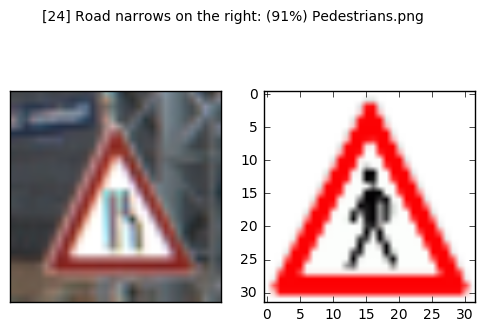

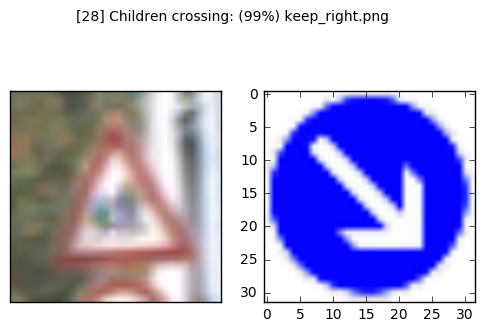

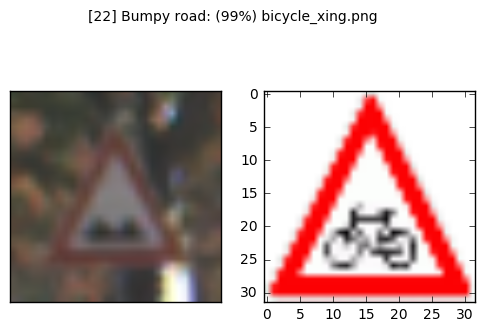

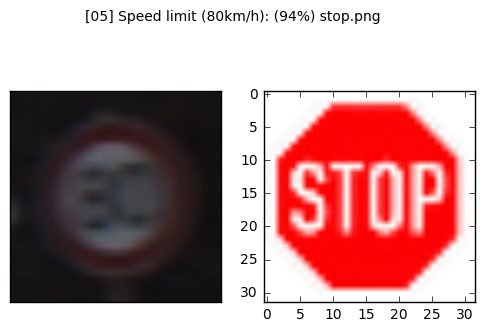

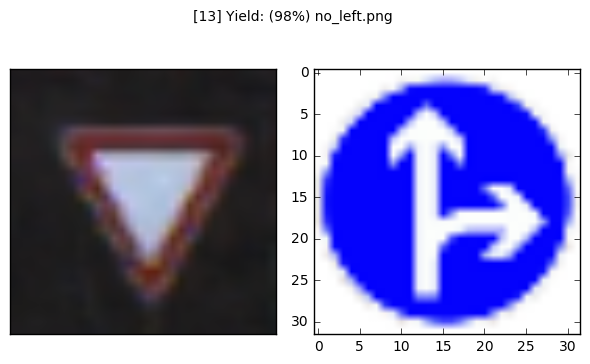

Top (2) Predictions Accuracy: 77%
Title Legend: [Index] SignName {Count}


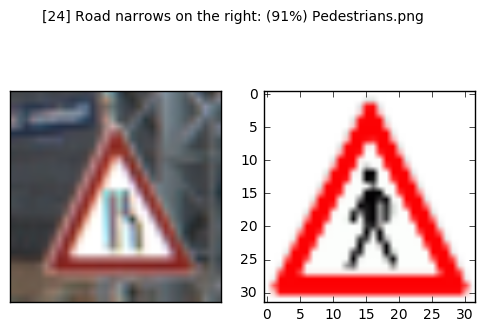

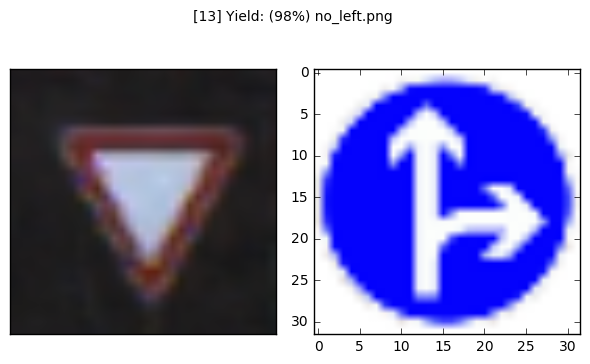

Top (3) Predictions Accuracy: 88%
Title Legend: [Index] SignName {Count}


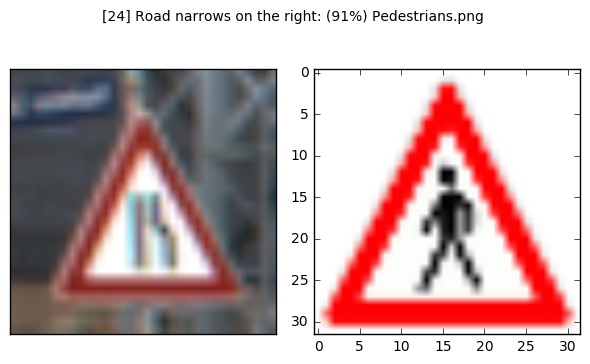

In [32]:
### Visualize the softmax probabilities here.
targets_de = [27, 25, 39, 37, 38, 29, 3, 14, 36]

targets = targets_de
for k in range(1,4):
    correct_prediction_external = tf.nn.in_top_k(probabilities, targets, k)
    accuracy_operation_external = tf.reduce_mean(100*tf.cast(correct_prediction_external, tf.int32))

    acc, valid_pred = sess.run([accuracy_operation_external, correct_prediction_external])
    print("Top (%d) Predictions Accuracy: %d%%" % (k, acc))
    show_images(predictions, probabilities, ~valid_pred)

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The images and their softmax probabilities are visualized in above Cell# `In[32]` for each of the top K={1,2,3}. The title of the images has the format - `Title Legend: [Index] Predicted_SignName {Softmax-Probability}; Actual_SignName")`

For example: `[24] Road narrows on the right: (91%) Pedestrians.png`


 
** The Top K Performances are summarized below ** 
 - Top K=1 Accuracy = 44%; while 
 - Top K=2 Accuracy = 77%
 - Top K=3 Accuracy = 88%
    - This is close to our Test Accuracy of 86%
    - Model was only uncertain of `STOP` sign
    - Using more preprocessing; using colors and data-augmentation the system could improve significantly.


**External vs Internal Test Image Prediction Accuracy**
External (44%; K=1) < Internal (86%). Reasons:
 - The images are not the same format as training images
    - The External Test Images are cropped to the sign **bounding box**; while the internal ones are not.
    - **Cropping** the internal images to the bounding box will improve this.
    - **Noise** outside of bounding box; **Background** of image is very different between External and Internal Test Images.

Robustness of the model to perform better on external test images could be increased by augmenting the system with 
 1. Synthetic Data
 -  Data Similar to External Test Data 
 -  Signs of the other parts of the world
 -  Better preprocessing
 - Exploring more models, etc.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.